In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score)

## 1.0 Data Collection and Exploration
### 1.1 Load the Dataset

In [2]:
cardioVas = pd.read_csv("dataset.csv")

### 1.2Explore Dataset


In [3]:
cardioVas.info()  # Get description of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2100 non-null   object 
 1   Age                     2100 non-null   int64  
 2   Height(cm)              2100 non-null   float64
 3   Weight(kg)              2100 non-null   float64
 4   Family_history          2100 non-null   object 
 5   Alcohol                 2100 non-null   object 
 6   Junk_food               2100 non-null   object 
 7   Vege_day                2100 non-null   int64  
 8   Meals_day               2100 non-null   int64  
 9   Snack                   2100 non-null   object 
 10  Smoking                 2100 non-null   object 
 11  Water_intake(L)         2100 non-null   float64
 12  Transportation          2100 non-null   object 
 13  Exercise                2100 non-null   int64  
 14  TV                      2100 non-null   

In [4]:
cardioVas.describe()

,Age,Height(cm),Weight(kg),Vege_day,Meals_day,Water_intake(L),Exercise,Income
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,24.302381,170.148286,86.561571,2.423333,2.687143,2.007429,1.006190,9432.386190
std,6.342270,9.340941,26.192242,0.584318,0.810088,0.613122,0.894885,5002.350673
min,14.000000,145.000000,39.000000,1.000000,1.000000,1.000000,0.000000,1000.000000
25%,20.000000,163.000000,65.400000,2.000000,3.000000,1.577500,0.000000,4994.500000
50%,23.000000,170.000000,83.000000,2.000000,3.000000,2.000000,1.000000,9226.500000
75%,26.000000,176.800000,107.250000,3.000000,3.000000,2.480000,2.000000,13841.750000
max,61.000000,198.000000,173.000000,3.000000,4.000000,3.000000,3.000000,18000.000000


In [5]:
#Look for any null value
print('Null values in dataset\n')
print(cardioVas.isnull().sum())

Null values in dataset

Gender                    0
Age                       0
Height(cm)                0
Weight(kg)                0
Family_history            0
Alcohol                   0
Junk_food                 0
Vege_day                  0
Meals_day                 0
Snack                     0
Smoking                   0
Water_intake(L)           0
Transportation            0
Exercise                  0
TV                        0
Income                    0
Discipline                0
Cardiovascular_risk(y)    0
dtype: int64


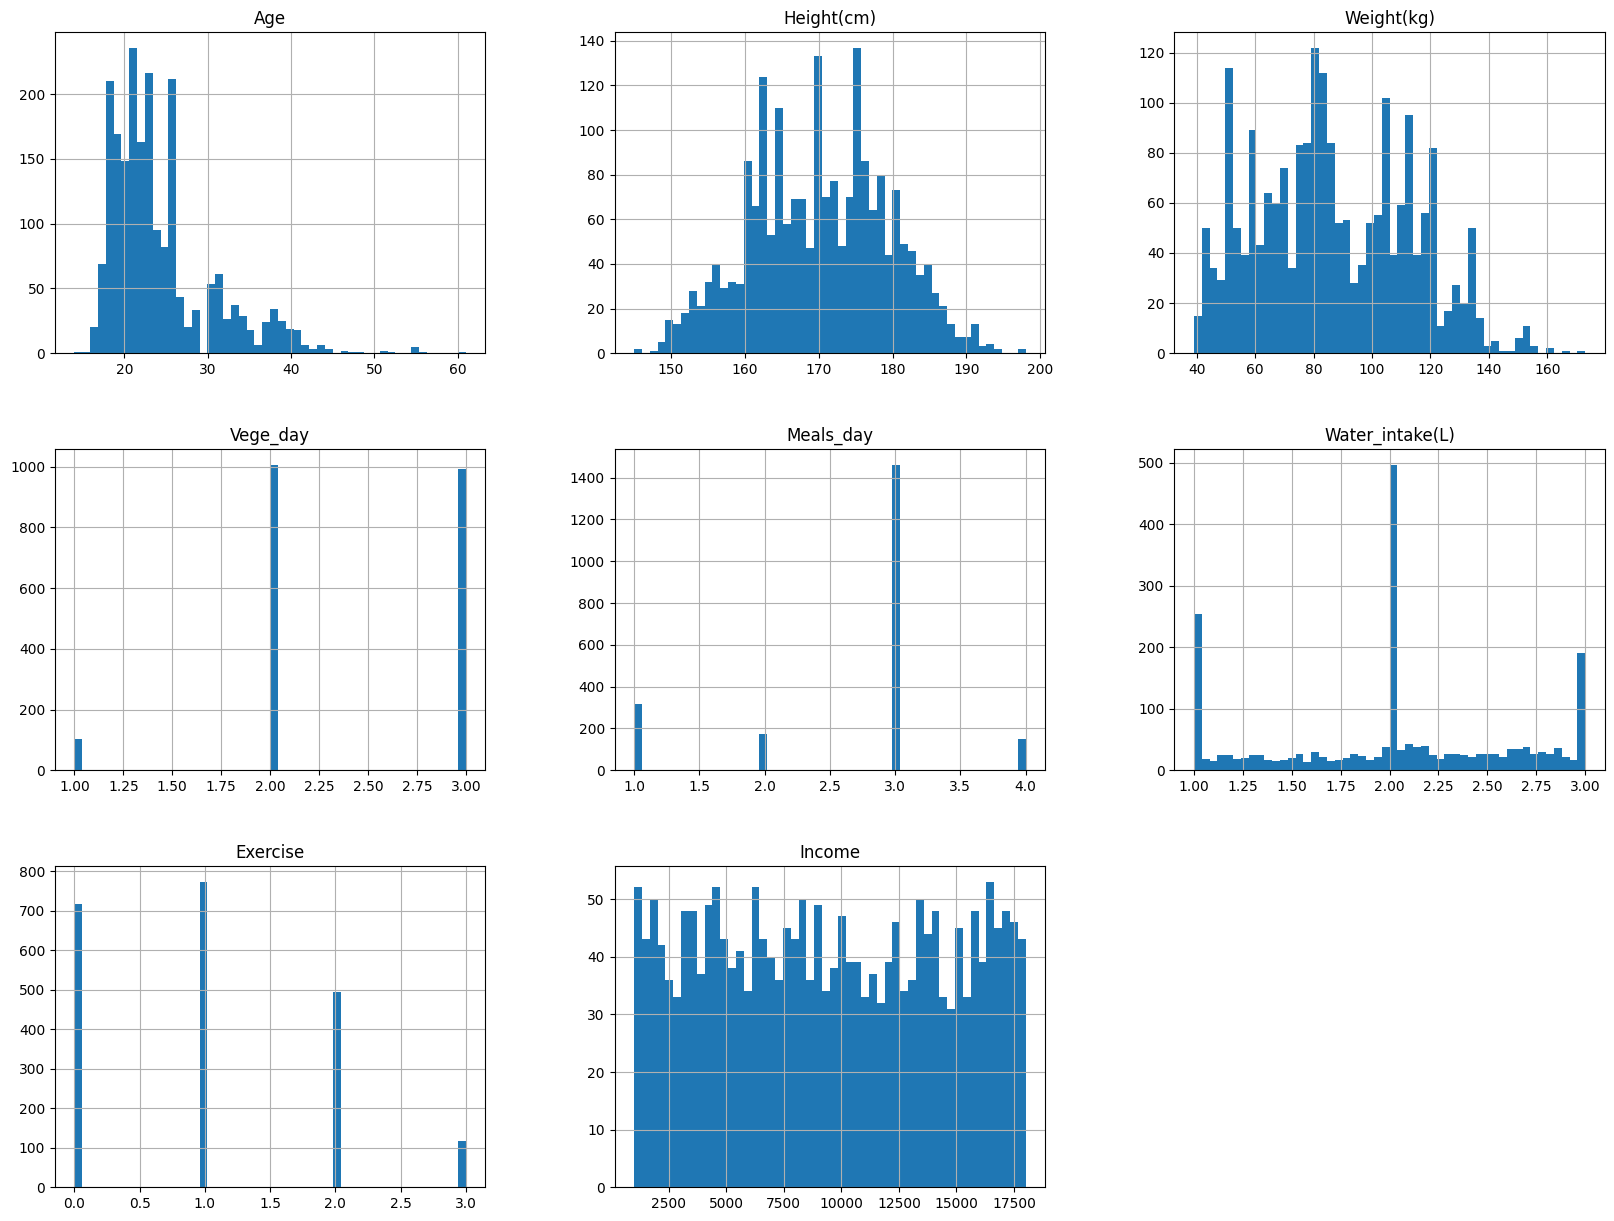

In [6]:
cardioVas.hist(bins=50, figsize=(20,15))
plt.show()

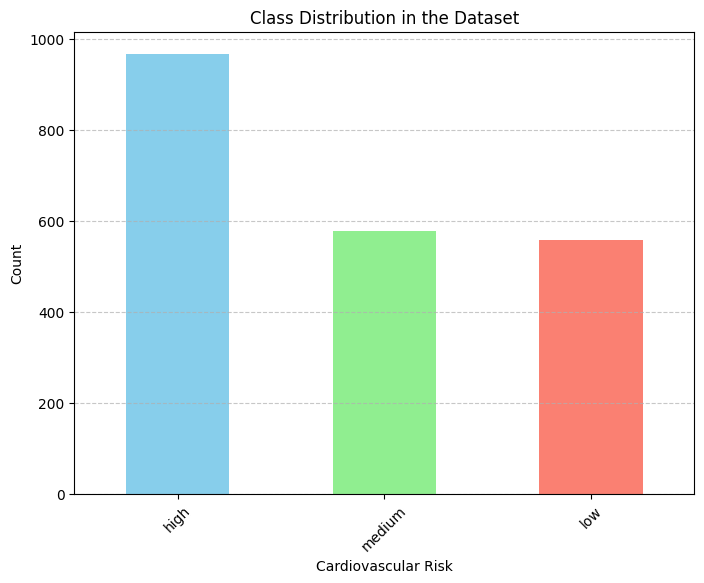

In [7]:
# Class distribution
class_distribution = cardioVas['Cardiovascular_risk(y)'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Cardiovascular Risk')
plt.ylabel('Count')
plt.title('Class Distribution in the Dataset')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\wongd\AppData\Local\Temp\ipykernel_26336\1642619886.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=cardioVas, palette={'Male': 'lightblue', 'Female': 'lightpink'})


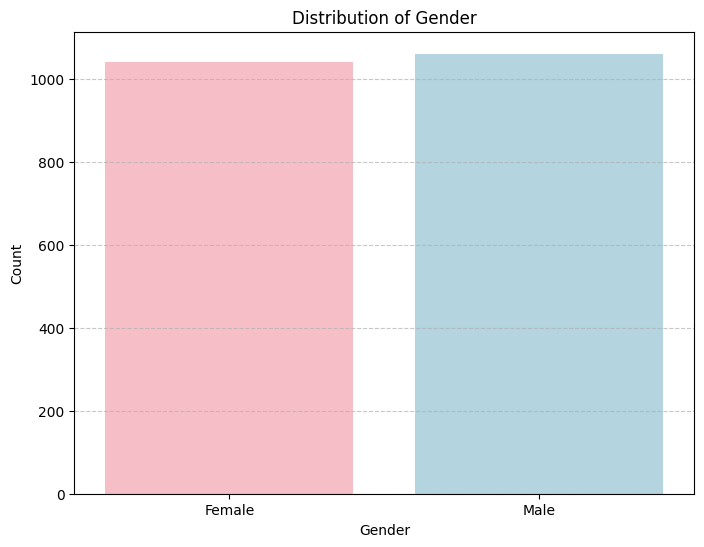

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=cardioVas, palette={'Male': 'lightblue', 'Female': 'lightpink'})
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\wongd\AppData\Local\Temp\ipykernel_26336\2834418375.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Family_history', data=cardioVas, palette={'yes': 'lightgreen', 'no': 'red'})


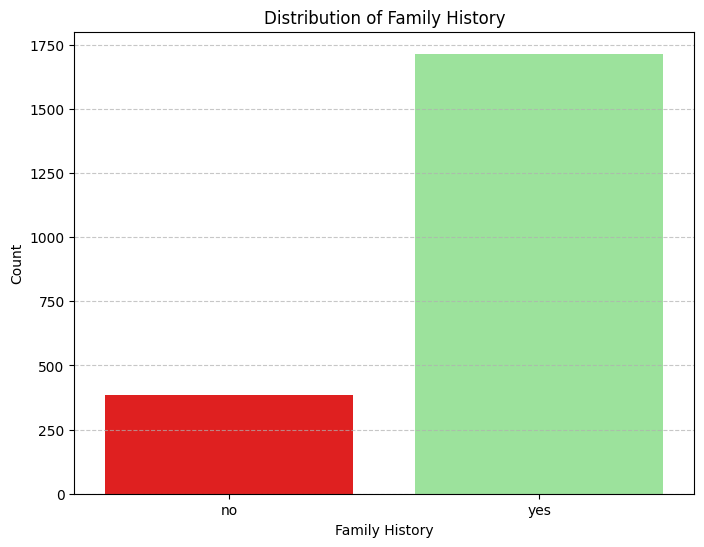

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Family_history', data=cardioVas, palette={'yes': 'lightgreen', 'no': 'red'})
plt.title('Distribution of Family History')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\wongd\AppData\Local\Temp\ipykernel_26336\1932480643.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Alcohol', data=cardioVas, palette={'low': 'yellow', 'none': 'gray', 'medium': 'blue', 'high': 'red'})


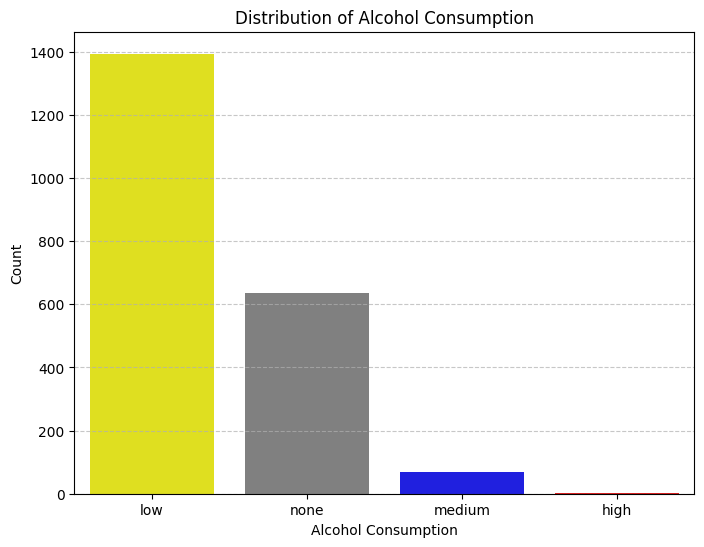

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Alcohol', data=cardioVas, palette={'low': 'yellow', 'none': 'gray', 'medium': 'blue', 'high': 'red'})
plt.title('Distribution of Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\wongd\AppData\Local\Temp\ipykernel_26336\718528222.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Junk_food', data=cardioVas, palette={'yes': 'red', 'no': 'green'})


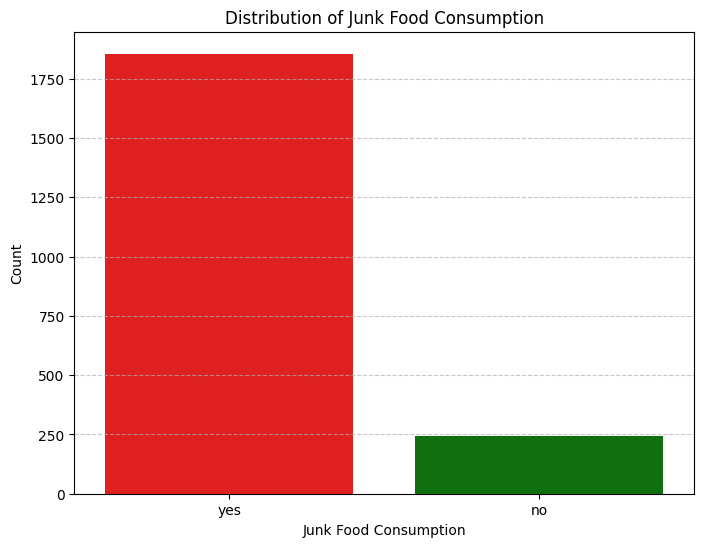

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Junk_food', data=cardioVas, palette={'yes': 'red', 'no': 'green'})
plt.title('Distribution of Junk Food Consumption')
plt.xlabel('Junk Food Consumption')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\wongd\AppData\Local\Temp\ipykernel_26336\2345838984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Snack', data=cardioVas, palette={'No':'pink','Sometimes': 'orange', 'Frequently': 'purple', 'Always': 'blue'})


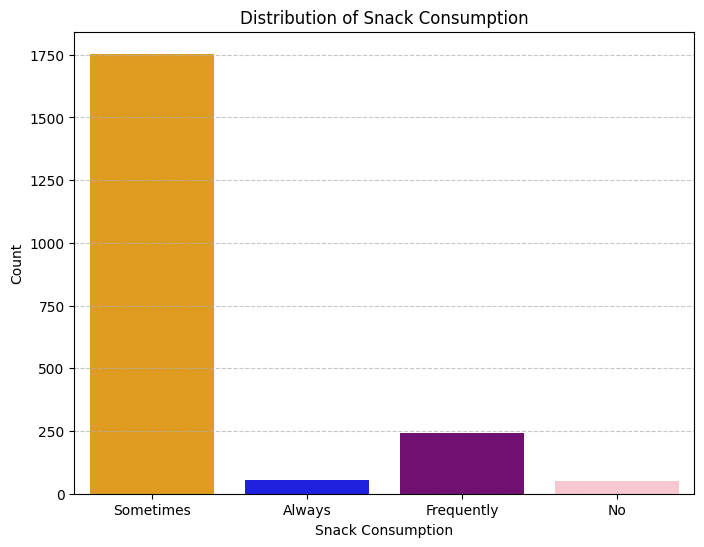

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Snack', data=cardioVas, palette={'No':'pink','Sometimes': 'orange', 'Frequently': 'purple', 'Always': 'blue'})
plt.title('Distribution of Snack Consumption')
plt.xlabel('Snack Consumption')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\wongd\AppData\Local\Temp\ipykernel_26336\2897251854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Smoking', data=cardioVas, palette={'yes': 'black', 'no': 'grey'})


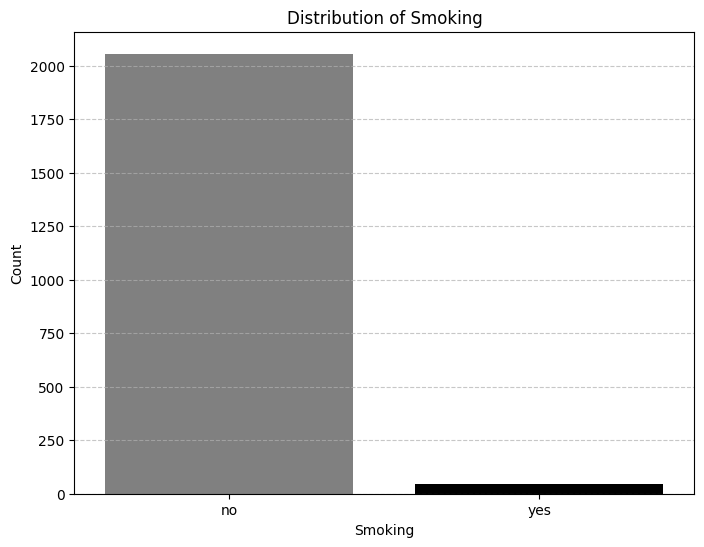

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Smoking', data=cardioVas, palette={'yes': 'black', 'no': 'grey'})
plt.title('Distribution of Smoking')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\wongd\AppData\Local\Temp\ipykernel_26336\2986209540.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transportation', data=cardioVas, palette={'motorcycle':'pink','car': 'blue', 'bus': 'green', 'bicycle': 'red', 'walk': 'purple'})


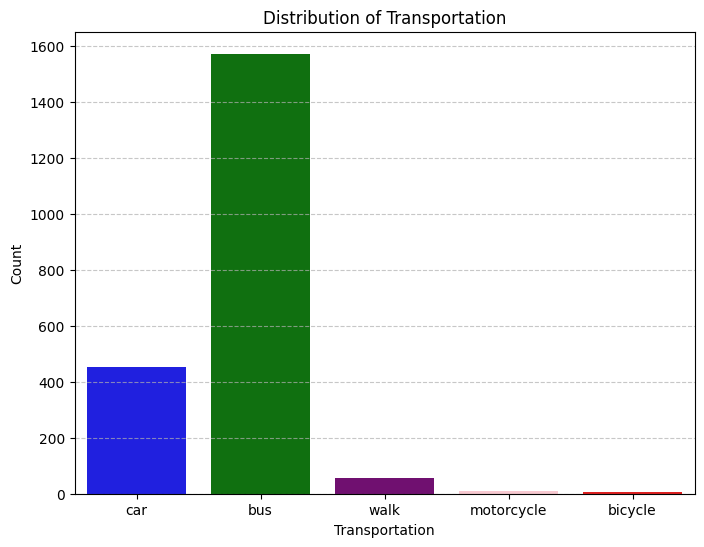

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Transportation', data=cardioVas, palette={'motorcycle':'pink','car': 'blue', 'bus': 'green', 'bicycle': 'red', 'walk': 'purple'})
plt.title('Distribution of Transportation')
plt.xlabel('Transportation')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\wongd\AppData\Local\Temp\ipykernel_26336\1971332978.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TV', data=cardioVas, palette={'rare': 'blue', 'moderate': 'gray','often':'red'})


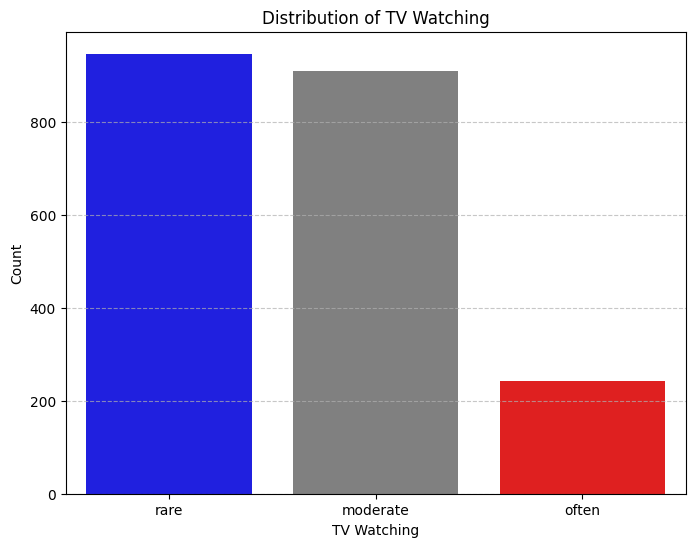

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='TV', data=cardioVas, palette={'rare': 'blue', 'moderate': 'gray','often':'red'})
plt.title('Distribution of TV Watching')
plt.xlabel('TV Watching')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\wongd\AppData\Local\Temp\ipykernel_26336\2749609671.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Discipline', data=cardioVas, palette={'yes': 'green', 'no': 'red'})


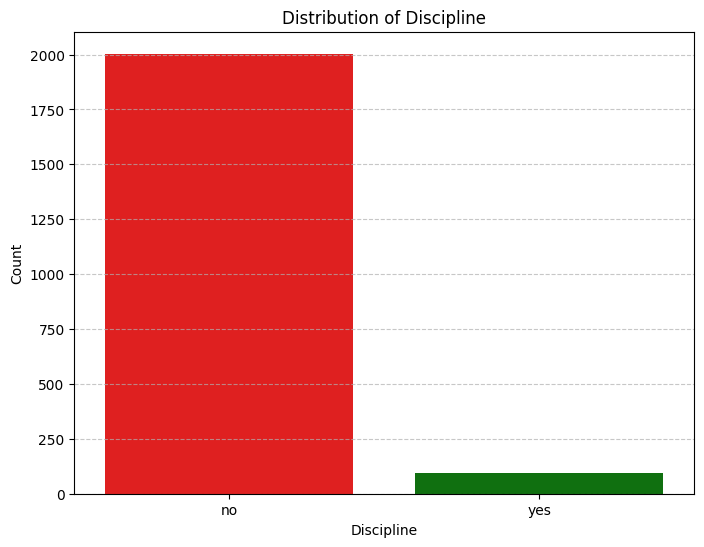

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Discipline', data=cardioVas, palette={'yes': 'green', 'no': 'red'})
plt.title('Distribution of Discipline')
plt.xlabel('Discipline')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 2.0 Data Preprocessing
### 2.1 Split the dataset into training and testing set

In [17]:
x = cardioVas.drop('Cardiovascular_risk(y)', axis=1)  # Features
y = cardioVas['Cardiovascular_risk(y)']  # Target variable

# Split dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [18]:
print ('full set shape=', x.shape)
print ('train shape=', x_train.shape)
print ('test shape=', x_test.shape)

full set shape= (2100, 17)
train shape= (1470, 17)
test shape= (630, 17)


### 2.2 Split into numerical and categorical sets

In [19]:
numeric_features = ['Age', 'Height(cm)', 'Weight(kg)', 'Vege_day', 'Meals_day', 'Water_intake(L)', 'Exercise', 'Income']
categorical_features = ['Gender', 'Family_history', 'Alcohol', 'Junk_food', 'Snack', 'Smoking', 'Transportation', 'TV', 'Discipline']


In [20]:
x_train_num = x_train[numeric_features]
x_train_cat = x_train[categorical_features]
x_test_num = x_test[numeric_features]
x_test_cat = x_test[categorical_features]

### 2.3 Preprocessing numerical data: Standardlization

In [21]:
scaler = StandardScaler()
x_train_num_scaled = scaler.fit_transform(x_train_num)
x_test_num_scaled = scaler.transform(x_test_num)

### 2.4 Preprocessing categorical data: One-hot encoding

In [22]:
ohe = OneHotEncoder(sparse_output=False)
x_train_cat_encoded = ohe.fit_transform(x_train_cat)
x_test_cat_encoded = ohe.transform(x_test_cat)

### 2.5 Combining categorical and numerical data 


In [23]:
x_train_processed = np.hstack([x_train_num_scaled, x_train_cat_encoded])
x_test_processed = np.hstack([x_test_num_scaled, x_test_cat_encoded])

### 2.6 Convert y_train and y_test into numpy arrays

In [24]:
x_train_processed = np.hstack([x_train_num_scaled, x_train_cat_encoded])
x_test_processed = np.hstack([x_test_num_scaled, x_test_cat_encoded])

In [25]:
print('X_train shape:', x_train_processed.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', x_test_processed.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1470, 34)
y_train shape: (1470,)
X_test shape: (630, 34)
y_test shape: (630,)


## 3.0 Function defining for model plotting and training
### 3.1 Defining function to plot confusion matrix

In [36]:
#Define confusion matrix function
 
def plot_confusion_matrix(cm, classes, model_name, dataset_name):
    num_classes = len(classes)

    # Prepare labels for the confusion matrix
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    
    # Ensure there are enough labels
    if len(group_counts) != len(group_percentages):
        raise ValueError("Mismatch in the number of counts and percentages.")
    
    # Combine counts and percentages into labels
    labels = [f"{count}\n{percent}" for count, percent in zip(group_counts, group_percentages)]
    
    # Reshape labels for the confusion matrix
    labels = np.array(labels).reshape(num_classes, num_classes)

    # Plot confusion matrix with seaborn heatmap
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False, 
                     xticklabels=classes, yticklabels=classes)

    # Set plot titles and labels
    plt.title(f'{model_name} - Confusion Matrix ({dataset_name})')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values')
    plt.show()
    plt.show()

### 3.2 Store results for each model for a general compare at the last


In [27]:
results = {}
    
    # Function to store results
def store_results(model_name,f1_train,f1_test, auc_train, auc_test):
    results[model_name] = {
        'F1-Score (Train)':f1_train,
         'F1-Score (Test)':f1_test,
          'AUC (Train)': auc_train,
        'AUC (Test)': auc_test,
    }


### 3.3 Defining function for evaluate and plot model

In [40]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model_name = model.__class__.__name__


    # Train the model
    model.fit(x_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Define cross-validation strategy
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Cross-validation scores (for training set only)
    cv_scores_train = cross_val_score(model, x_train, y_train, cv=cv, scoring='accuracy')
    cv_predictions_train = cross_val_predict(model, x_train, y_train, cv=cv)
    

    # Performance metrics for training set
    print(f'\n{model_name} performance on Training Set:')
    print(f'Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}')
    print(f'Cross-validation Accuracy: {cv_scores_train.mean():.4f} ± {cv_scores_train.std():.4f}')
    print(f'Precision (macro): {precision_score(y_train, cv_predictions_train, average="macro"):.4f}')
    print(f'Recall (macro): {recall_score(y_train, cv_predictions_train, average="macro"):.4f}')
    f1_train = f1_score(y_train, cv_predictions_train, average="macro")
    print(f'F1 Score (macro): {f1_train:.4f}')
    
    # AUC Score (Training Set)
    y_train_bin = label_binarize(y_train, classes=model.classes_)
    y_train_scores = cross_val_predict(model, x_train, y_train, cv=cv, method='predict_proba')
    auc_train = roc_auc_score(y_train_bin, y_train_scores, multi_class='ovr', average='macro')
    print(f'AUC (Training Set): {auc_train:.4f}')
    
    # Confusion Matrix for train set
    cm_train = confusion_matrix(y_train, cv_predictions_train, labels=model.classes_)
    plot_confusion_matrix(cm_train, model.classes_, model_name,'Train')

    # Precision-Recall Curve (Training Set)
    precisions_train, recalls_train, _ = zip(*[precision_recall_curve(label_binarize(y_train, classes=model.classes_)[:, i], cross_val_predict(model, x_train, y_train, cv=cv, method='predict_proba')[:, i]) for i in range(y_train_bin.shape[1])])
    
    plt.figure(figsize=(8, 6))
    for i, label in enumerate(model.classes_):
        plt.plot(recalls_train[i], precisions_train[i], label=f'Train Class {label}')
    plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--', label='Random')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model.__class__.__name__} - Precision-Recall Curve (Training Set)')
    plt.legend()
    plt.show()

    # ROC Curve (Training Set)
    fpr_train, tpr_train, _ = zip(*[roc_curve(label_binarize(y_train, classes=model.classes_)[:, i], cross_val_predict(model, x_train, y_train, cv=cv, method='predict_proba')[:, i]) for i in range(y_train_bin.shape[1])])
    
    plt.figure(figsize=(8, 6))
    for i, label in enumerate(model.classes_):
        plt.plot(fpr_train[i], tpr_train[i], label=f'Train Class {label}')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model.__class__.__name__} - ROC Curve (Training Set)')
    plt.legend()
    plt.show()


    # Performance metrics for test set (no cross-validation)
    print(f'\n{model.__class__.__name__} performance on Test Set:')
    print(f'Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}')
    print(f'Precision (macro): {precision_score(y_test, y_test_pred, average="macro"):.4f}')
    print(f'Recall (macro): {recall_score(y_test, y_test_pred, average="macro"):.4f}')
    f1_test = f1_score(y_test, y_test_pred, average="macro")
    print(f'F1 Score (macro): {f1_test:.4f}')
    
    # AUC Score (Test Set)
    y_test_bin = label_binarize(y_test, classes=model.classes_)
    y_test_scores = model.predict_proba(x_test)
    auc_test = roc_auc_score(y_test_bin, y_test_scores, multi_class='ovr', average='macro')
    print(f'AUC (Test Set): {auc_test:.4f}')
    
    # Confusion Matrix for Test Set
    cm_test = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
    plot_confusion_matrix(cm_test, model.classes_, model_name,'Test')

    # Precision-Recall Curve (Test Set)
    precisions_test, recalls_test, _ = zip(*[precision_recall_curve(y_test_bin[:, i], y_test_scores[:, i]) for i in range(y_test_bin.shape[1])])
    
    plt.figure(figsize=(8, 6))
    for i, label in enumerate(model.classes_):
        plt.plot(recalls_test[i], precisions_test[i], label=f'Test Class {label}')
    plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--', label='Random')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model.__class__.__name__} - Precision-Recall Curve (Test Set)')
    plt.legend()
    plt.show()

    # ROC Curve (Test Set)
    fpr_test, tpr_test, _ = zip(*[roc_curve(y_test_bin[:, i], y_test_scores[:, i]) for i in range(y_test_bin.shape[1])])
    
    plt.figure(figsize=(8, 6))
    for i, label in enumerate(model.classes_):
        plt.plot(fpr_test[i], tpr_test[i], label=f'Test Class {label}')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model.__class__.__name__} - ROC Curve (Test Set)')
    plt.legend()
    plt.show()



    store_results(model_name, f1_train, f1_test, auc_train, auc_test)
    



## 4.0 Define parameter grids for each model
### 4.1 Parameter tuning for each model

In [29]:
param_grids = {
    'SGDClassifier': {
              'loss': ['squared_error', 'log_loss', 'modified_huber'],
        'alpha': [  0.01, 0.1,1],  # Adjust alpha values for regularization
        'eta0': [ 0.01, 0.1,0.5],  # Initial learning rate
        'max_iter': [1000, 2000, 3000],  # Number of iterations
        'tol': [1e-4, 1e-3, 1e-2],  # Tolerance for stopping criterion
        'penalty': ['l2', 'l1', 'elasticnet'],  # Regularization type
        'class_weight': ['balanced'],
    },
    'LogisticRegression': {
        'solver': ['liblinear', 'lbfgs', 'newton-cg'],  # Additional solvers
        'C': [ 0.01, 0.1, 1.0,],  # Broaden range of C
         'class_weight': ['balanced'],
        'max_iter': [1000, 1500,2000,4000]  # More iterations
    },
    'RandomForestClassifier': {
         'class_weight': ['balanced'],
        'n_estimators': [50, 100, 150,200,300],  # Expanded range of estimators
        'max_depth': [10, 15, 20],  # More depth options
        'min_samples_split': [ 5, 10, 15],  # Expanded min_samples_split
        'min_samples_leaf': [5,4, 6,8,10]  # Expanded min_samples_leaf
    }
}


### 4.2 Defining function to perform Grid Search
#### To find the best hyperparameters for each model

In [30]:
def perform_grid_search(model_class, param_grid, x_train, y_train):
    print(f"Performing Grid Search for {model_class}...")
    model = model_class(random_state=30)
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train, y_train)
    print(f"Best Parameters: {grid_search.best_params_}\n")
    return grid_search.best_estimator_

### 4.3 Perform Grid search for each model and validate using train set

In [31]:
sgd_clf_best = perform_grid_search(SGDClassifier, param_grids['SGDClassifier'], x_train_processed, y_train)
log_reg_best = perform_grid_search(LogisticRegression, param_grids['LogisticRegression'], x_train_processed, y_train)
rf_clf_best = perform_grid_search(RandomForestClassifier, param_grids['RandomForestClassifier'], x_train_processed, y_train)

Performing Grid Search for <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>...
Best Parameters: {'alpha': 0.01, 'class_weight': 'balanced', 'eta0': 0.01, 'loss': 'modified_huber', 'max_iter': 1000, 'penalty': 'l1', 'tol': 0.0001}

Performing Grid Search for <class 'sklearn.linear_model._logistic.LogisticRegression'>...


c:\Users\wongd\Downloads\UCCD2063-Assignment-2024June\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'C': 1.0, 'class_weight': 'balanced', 'max_iter': 1000, 'solver': 'newton-cg'}

Performing Grid Search for <class 'sklearn.ensemble._forest.RandomForestClassifier'>...
Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}



## 5.0 Compare and Evaluate the best models base on train and test set

Evaluating Best SGDClassifier...

SGDClassifier performance on Training Set:
Training Accuracy: 0.9850
Cross-validation Accuracy: 0.9830 ± 0.0065
Precision (macro): 0.9804
Recall (macro): 0.9806
F1 Score (macro): 0.9804
AUC (Training Set): 0.9897


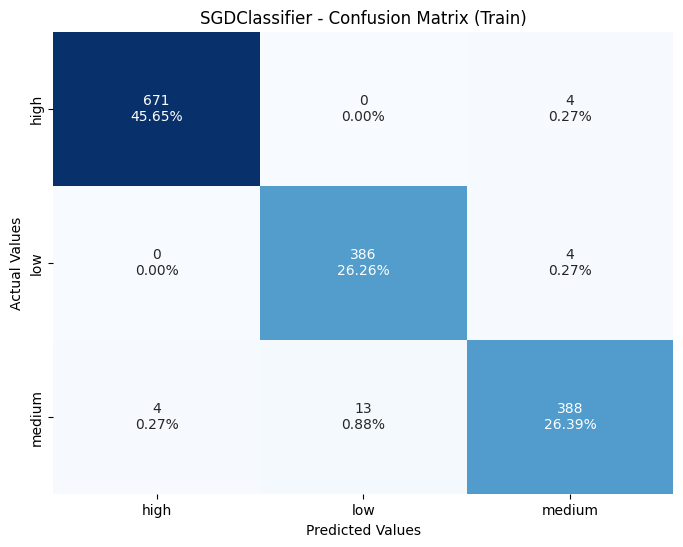

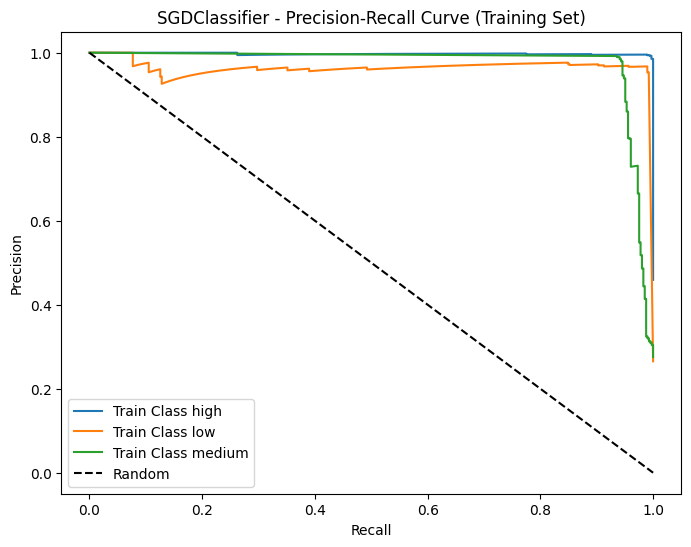

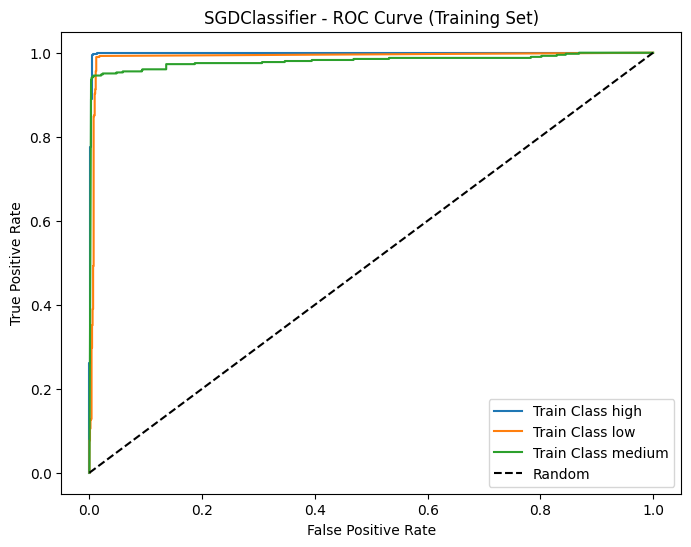


SGDClassifier performance on Test Set:
Test Accuracy: 0.9730
Precision (macro): 0.9688
Recall (macro): 0.9674
F1 Score (macro): 0.9681
AUC (Test Set): 0.9811


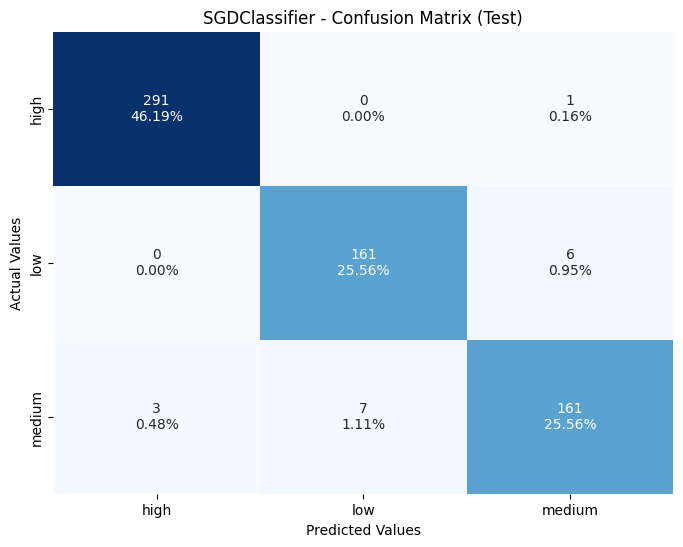

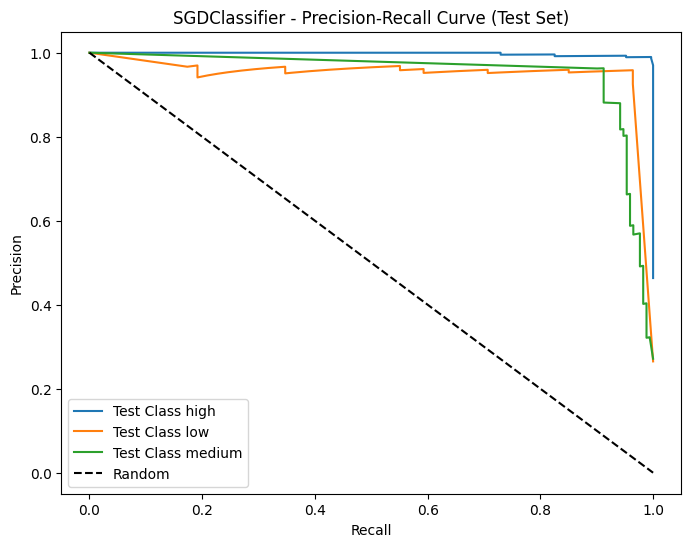

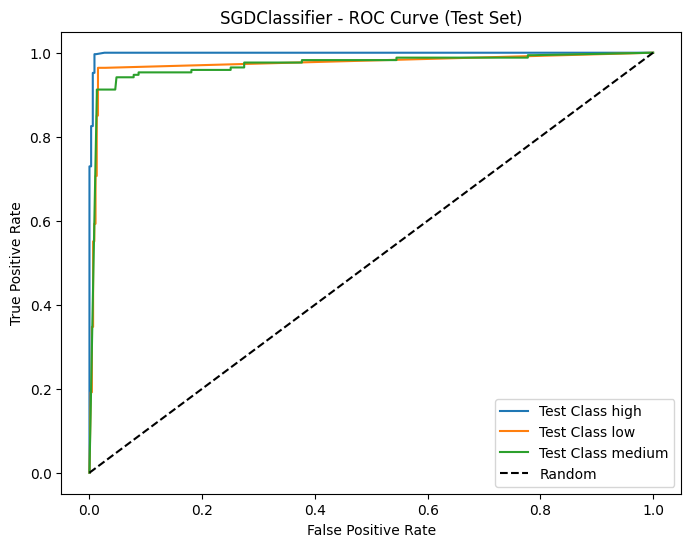

Evaluating Best LogisticRegression...

LogisticRegression performance on Training Set:
Training Accuracy: 0.9816
Cross-validation Accuracy: 0.9694 ± 0.0037
Precision (macro): 0.9646
Recall (macro): 0.9672
F1 Score (macro): 0.9655
AUC (Training Set): 0.9983


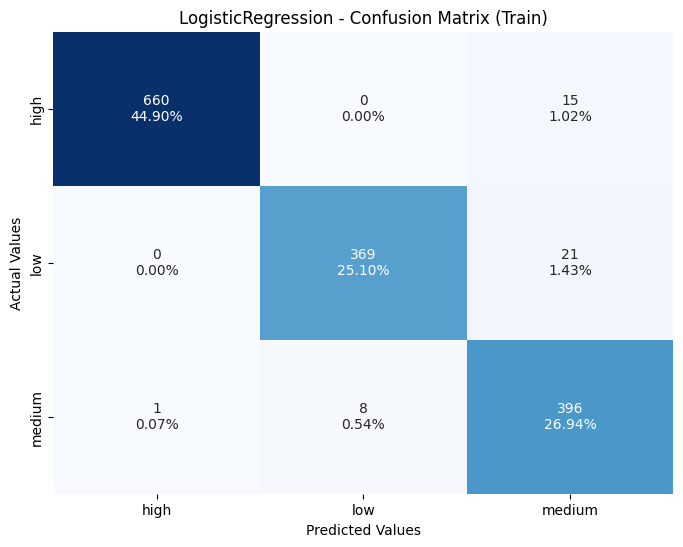

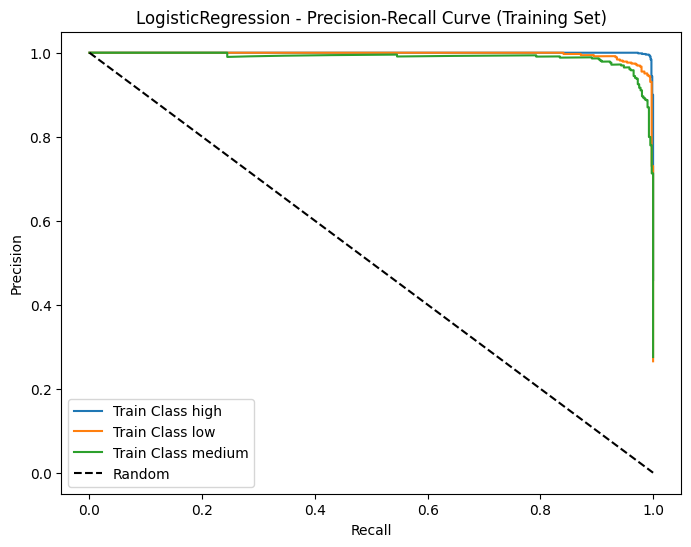

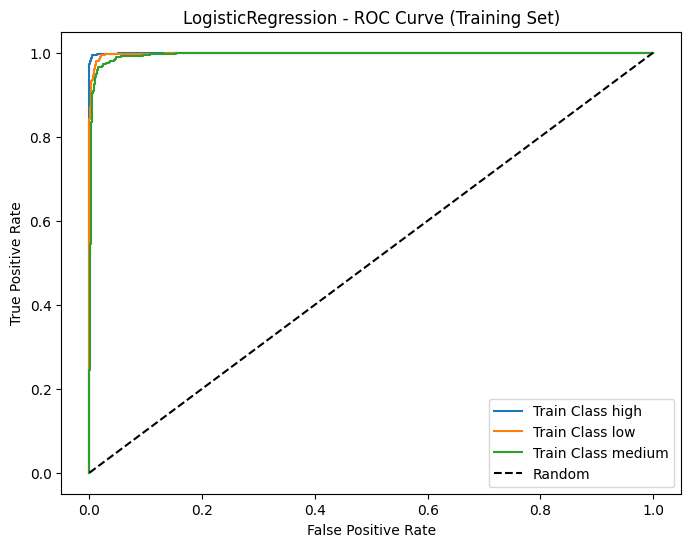


LogisticRegression performance on Test Set:
Test Accuracy: 0.9587
Precision (macro): 0.9514
Recall (macro): 0.9502
F1 Score (macro): 0.9505
AUC (Test Set): 0.9972


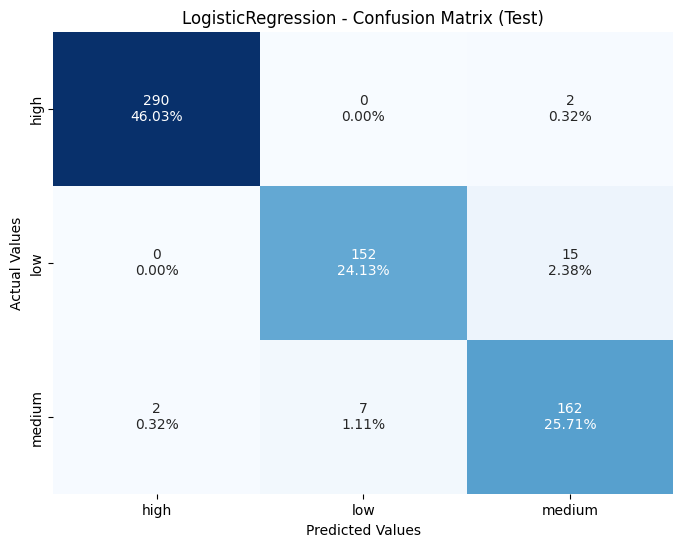

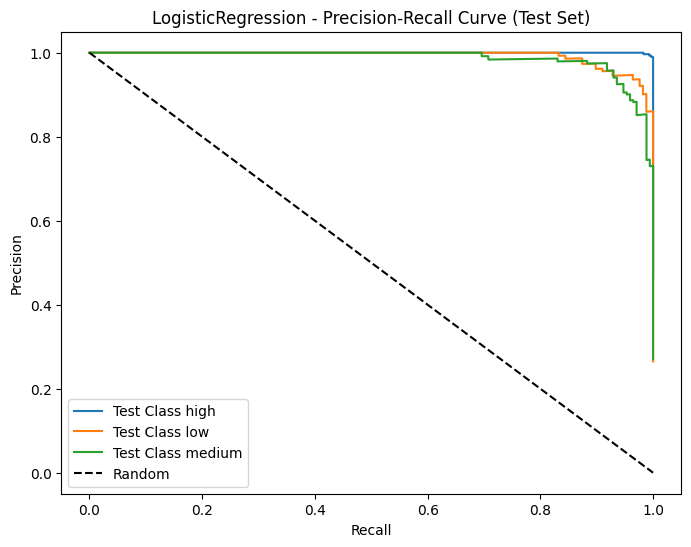

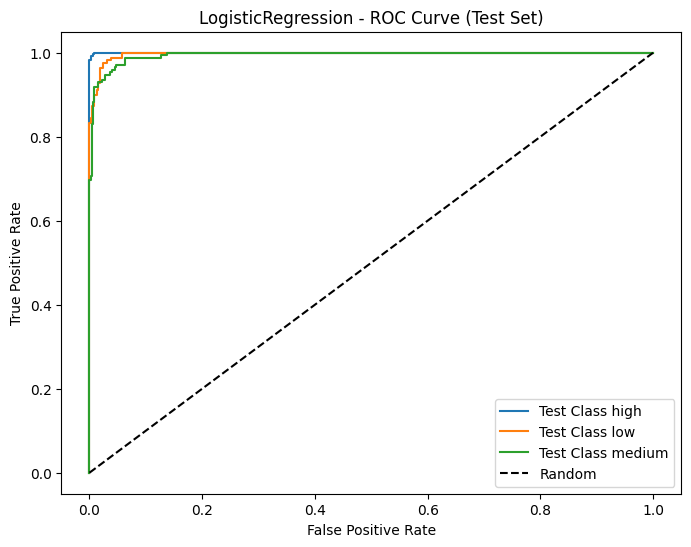

Evaluating Best RandomForestClassifier...

RandomForestClassifier performance on Training Set:
Training Accuracy: 0.9782
Cross-validation Accuracy: 0.9401 ± 0.0115
Precision (macro): 0.9303
Recall (macro): 0.9340
F1 Score (macro): 0.9320
AUC (Training Set): 0.9908


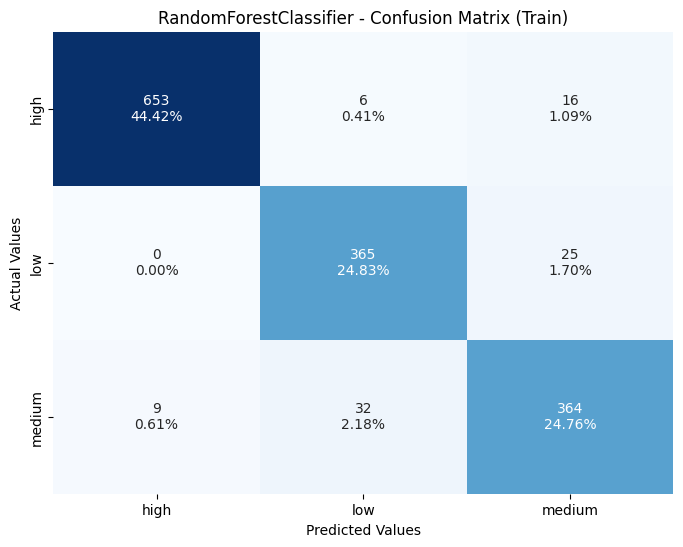

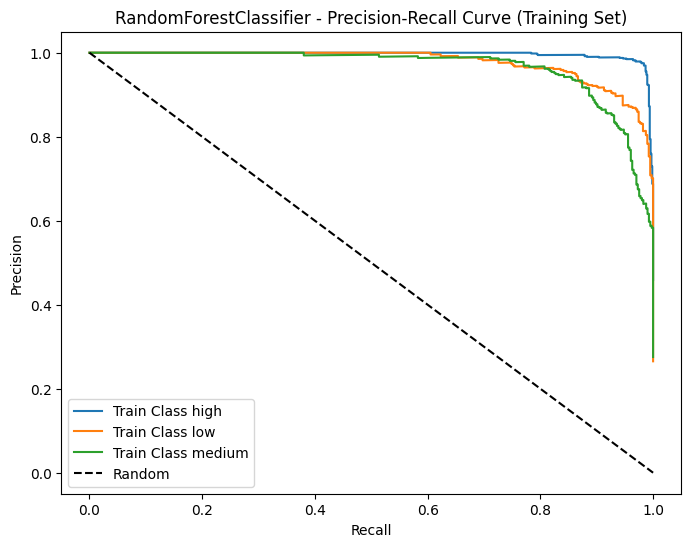

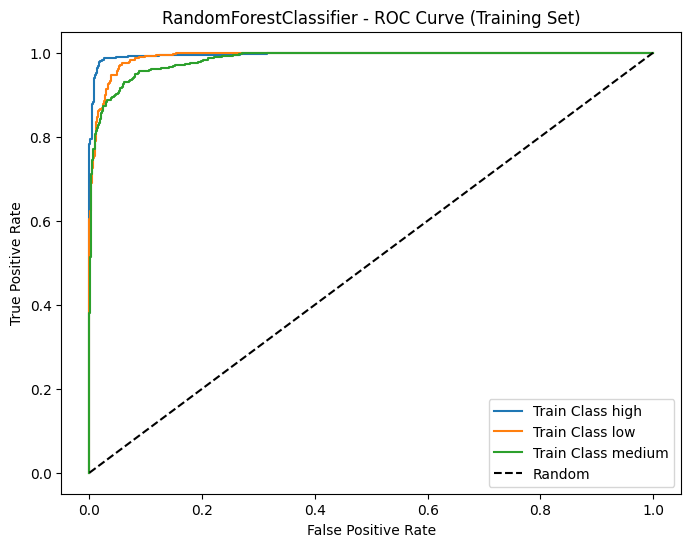


RandomForestClassifier performance on Test Set:
Test Accuracy: 0.9397
Precision (macro): 0.9277
Recall (macro): 0.9310
F1 Score (macro): 0.9292
AUC (Test Set): 0.9900


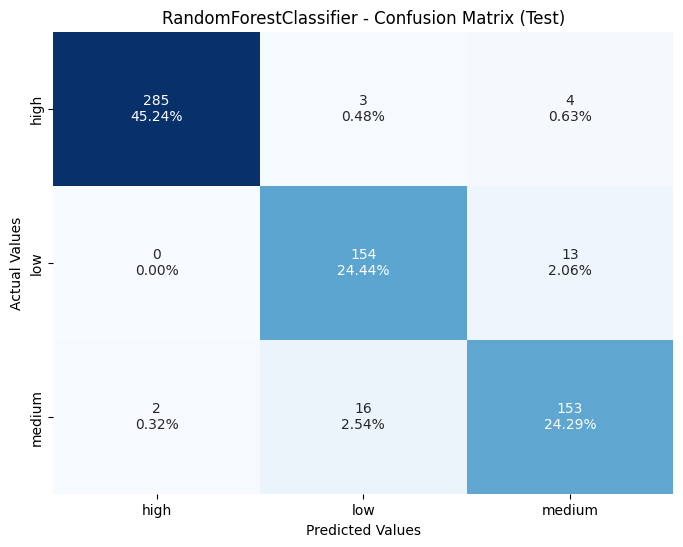

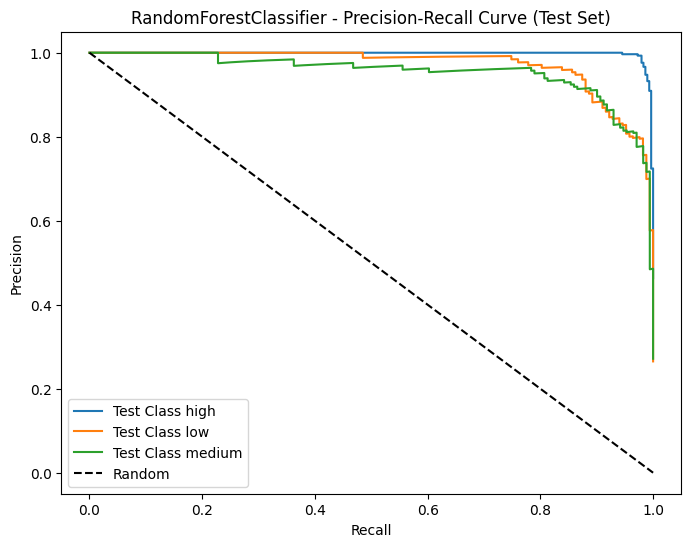

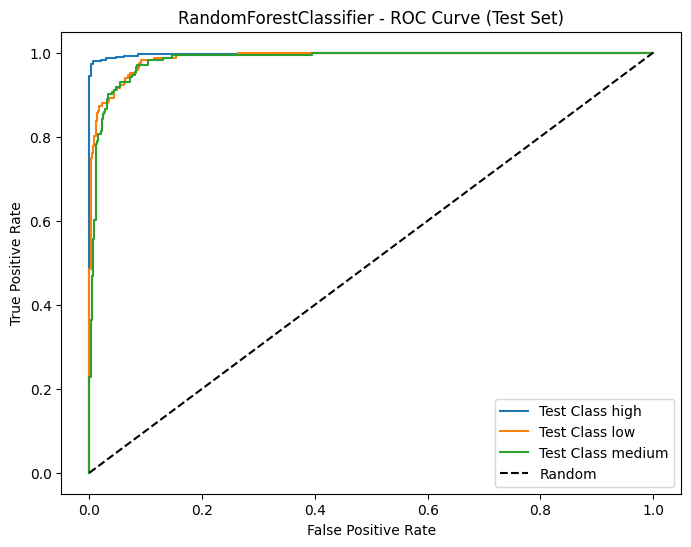

In [41]:
print("Evaluating Best SGDClassifier...")
evaluate_model(sgd_clf_best, x_train_processed, y_train, x_test_processed,y_test)

print("Evaluating Best LogisticRegression...")
evaluate_model(log_reg_best, x_train_processed, y_train, x_test_processed,y_test)

print("Evaluating Best RandomForestClassifier...")
evaluate_model(rf_clf_best, x_train_processed, y_train, x_test_processed, y_test)


### 5.1 General summary and compare performance of each model


In [130]:
comparison_df = pd.DataFrame(results).T
print(comparison_df)

                        F1-Score (Train)  F1-Score (Test)  AUC (Train)  \
SGDClassifier                   0.980439         0.968074     0.989698   
LogisticRegression              0.965484         0.950460     0.998260   
RandomForestClassifier          0.932045         0.929233     0.990797   

                        AUC (Test)  
SGDClassifier             0.981123  
LogisticRegression        0.997181  
RandomForestClassifier    0.990036  
